**The Scenario: "The Monday Morning Harvest Report"**
- Misi: Kamu menerima data mentah panen sawit dari lapangan. Data ini berantakan (ada yang kosong, tipe data salah). Kamu harus:
- Membersihkan data (Cleaning).
- Menghitung gaji pekerja berdasarkan hasil panen (Manipulation).
- Mencari Blok paling produktif (Aggregation).
- Menulis kesimpulan.

**Target Sesi: "From Messy to Clean & Aggregated"**

In [80]:
import pandas as pd
import numpy as np


data = {
    'Date': ['2024-01-20', '2024-01-20', '2024-01-20', '2024-01-21', '2024-01-21', '2024-01-22', '2024-01-22', '2024-01-22'],
    'Block_ID': ['Blok A', 'Blok B', 'Blok A', 'Blok C', 'Blok B', 'Blok A', 'Blok C', 'Blok A'],
    'Harvester': ['Budi', 'Slamet', 'Joko', 'Slamet', 'Budi', 'Joko', 'Budi', np.nan], # Ada nama yang hilang
    'Total_Weight_kg': [1200, 850, 1300, 900, 1150, '1250', 980, 1100], # Perhatikan ada string '1250'
    'Rotten_Bunches': [5, 2, 8, 1, 4, 3, 2, 5]
}


df = pd.DataFrame(data) 

df.to_csv('harvest_report.csv', index=True)





In [81]:
print("Initial Data:")
dafe = pd.read_csv('harvest_report.csv')
dafe = df.reset_index(drop=True)
dafe

Initial Data:


,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches
0,2024-01-20,Blok A,Budi,1200,5
1,2024-01-20,Blok B,Slamet,850,2
2,2024-01-20,Blok A,Joko,1300,8
3,2024-01-21,Blok C,Slamet,900,1
4,2024-01-21,Blok B,Budi,1150,4
5,2024-01-22,Blok A,Joko,1250,3
6,2024-01-22,Blok C,Budi,980,2
7,2024-01-22,Blok A,NaN,1100,5


In [82]:
dafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             8 non-null      object
 1   Block_ID         8 non-null      object
 2   Harvester        7 non-null      object
 3   Total_Weight_kg  8 non-null      object
 4   Rotten_Bunches   8 non-null      int64 
dtypes: int64(1), object(4)
memory usage: 452.0+ bytes


**Cleaning (Pembersihan)**

In [83]:
dafe['Date'] = pd.to_datetime(dafe['Date'])
print(dafe.dtypes)

Date               datetime64[ns]
Block_ID                   object
Harvester                  object
Total_Weight_kg            object
Rotten_Bunches              int64
dtype: object


In [84]:
print(dafe['Block_ID'].unique())
dafe['Block_ID'] = dafe['Block_ID'].astype('category')

['Blok A' 'Blok B' 'Blok C']


In [85]:
print(dafe.dtypes)

Date               datetime64[ns]
Block_ID                 category
Harvester                  object
Total_Weight_kg            object
Rotten_Bunches              int64
dtype: object


In [86]:
dafe['Harvester'] = dafe['Harvester'].fillna('Unknown')
dafe['Harvester'] = dafe['Harvester'].astype('category')
print(dafe['Harvester'].unique())

['Budi', 'Slamet', 'Joko', 'Unknown']
Categories (4, object): ['Budi', 'Joko', 'Slamet', 'Unknown']


In [87]:
print(dafe.dtypes)

Date               datetime64[ns]
Block_ID                 category
Harvester                category
Total_Weight_kg            object
Rotten_Bunches              int64
dtype: object


In [88]:
# regex_Python keren Menghapus semua yang bukan angka (\D)
dafe['Total_Weight_kg'] = dafe['Total_Weight_kg'].astype(str).str.replace(r'\D', '', regex=True)

# ubah ke integer
dafe['Total_Weight_kg'] = dafe['Total_Weight_kg'].astype(int)

print(dafe['Total_Weight_kg'].unique())
print(dafe.dtypes)


[1200  850 1300  900 1150 1250  980 1100]
Date               datetime64[ns]
Block_ID                 category
Harvester                category
Total_Weight_kg             int64
Rotten_Bunches              int64
dtype: object


In [89]:
print(dafe.isna().sum())


Date               0
Block_ID           0
Harvester          0
Total_Weight_kg    0
Rotten_Bunches     0
dtype: int64


In [90]:
dafe

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches
0,2024-01-20,Blok A,Budi,1200,5
1,2024-01-20,Blok B,Slamet,850,2
2,2024-01-20,Blok A,Joko,1300,8
3,2024-01-21,Blok C,Slamet,900,1
4,2024-01-21,Blok B,Budi,1150,4
5,2024-01-22,Blok A,Joko,1250,3
6,2024-01-22,Blok C,Budi,980,2
7,2024-01-22,Blok A,Unknown,1100,5


**Feature Engineering (Menambah Kolom)**

In [91]:
dafe['Net_Weight_kg'] = dafe['Total_Weight_kg'] - (dafe['Rotten_Bunches'] * 5)
dafe

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg
0,2024-01-20,Blok A,Budi,1200,5,1175
1,2024-01-20,Blok B,Slamet,850,2,840
2,2024-01-20,Blok A,Joko,1300,8,1260
3,2024-01-21,Blok C,Slamet,900,1,895
4,2024-01-21,Blok B,Budi,1150,4,1130
5,2024-01-22,Blok A,Joko,1250,3,1235
6,2024-01-22,Blok C,Budi,980,2,970
7,2024-01-22,Blok A,Unknown,1100,5,1075


In [92]:
dafe['Wages_IDR'] = 200 * dafe['Net_Weight_kg']
dafe['Wages_IDR'] = dafe['Wages_IDR'].round(0).astype(int)

dafe

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR
0,2024-01-20,Blok A,Budi,1200,5,1175,235000
1,2024-01-20,Blok B,Slamet,850,2,840,168000
2,2024-01-20,Blok A,Joko,1300,8,1260,252000
3,2024-01-21,Blok C,Slamet,900,1,895,179000
4,2024-01-21,Blok B,Budi,1150,4,1130,226000
5,2024-01-22,Blok A,Joko,1250,3,1235,247000
6,2024-01-22,Blok C,Budi,980,2,970,194000
7,2024-01-22,Blok A,Unknown,1100,5,1075,215000


**Aggregation (Analisis)**

In [93]:
# Melihat ringkasan statistik upah
print(dafe['Wages_IDR'].describe())


count         8.000000
mean     214500.000000
std       31300.387948
min      168000.000000
25%      190250.000000
50%      220500.000000
75%      238000.000000
max      252000.000000
Name: Wages_IDR, dtype: float64


In [94]:
# Menghitung gaji pekerja berdasarkan hasil panen (Manipulation)
a = dafe.groupby('Harvester', observed=True)[['Net_Weight_kg', 'Wages_IDR']].sum().sort_values(by='Wages_IDR', ascending=False)
print(a)

           Net_Weight_kg  Wages_IDR
Harvester                          
Budi                3275     655000
Joko                2495     499000
Slamet              1735     347000
Unknown             1075     215000


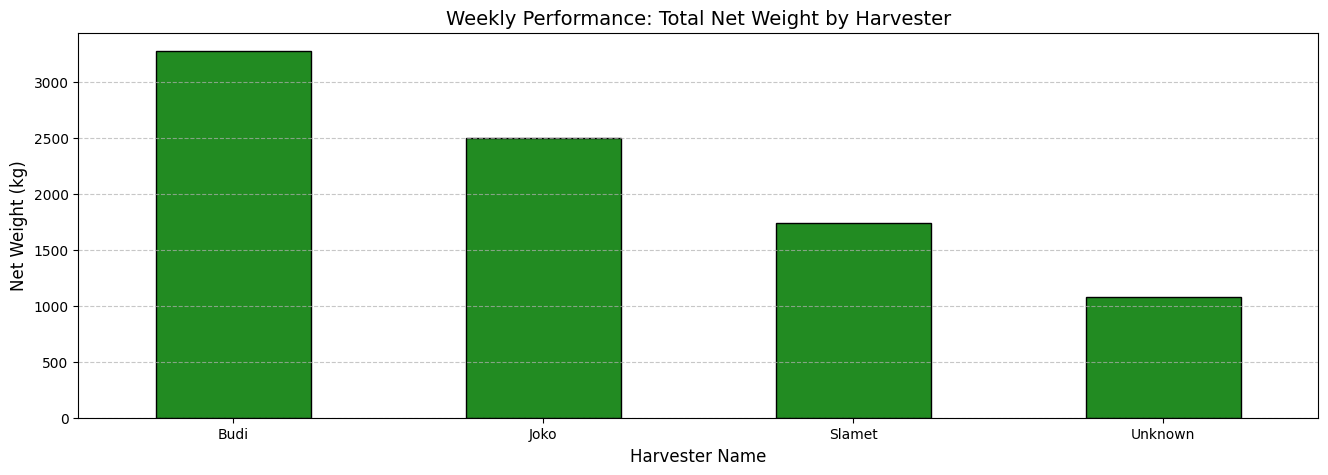

In [95]:
import matplotlib.pyplot as plt

performa_pemanen = dafe.groupby('Harvester', observed=True)['Net_Weight_kg'].sum()

# Membuat Canvas
plt.figure(figsize=(16, 5))

# Plotting
# Kita beri warna hijau 'forestgreen' biar nuansa sawit
performa_pemanen.plot(kind='bar', color='forestgreen', edgecolor='black')

# English Labels (Penting buat English Combo!)
plt.title('Weekly Performance: Total Net Weight by Harvester', fontsize=14)
plt.xlabel('Harvester Name', fontsize=12)
plt.ylabel('Net Weight (kg)', fontsize=12)
plt.xticks(rotation=0) # Biar tulisan nama tegak lurus
plt.grid(axis='y', linestyle='--', alpha=0.7) # Garis bantu tipis-tipis

plt.show()


In [96]:
# Mencari Blok paling produktif (Aggregation)
dafe.groupby('Block_ID', observed=True)['Total_Weight_kg'].mean()

Block_ID
Blok A    1212.5
Blok B    1000.0
Blok C     940.0
Name: Total_Weight_kg, dtype: float64

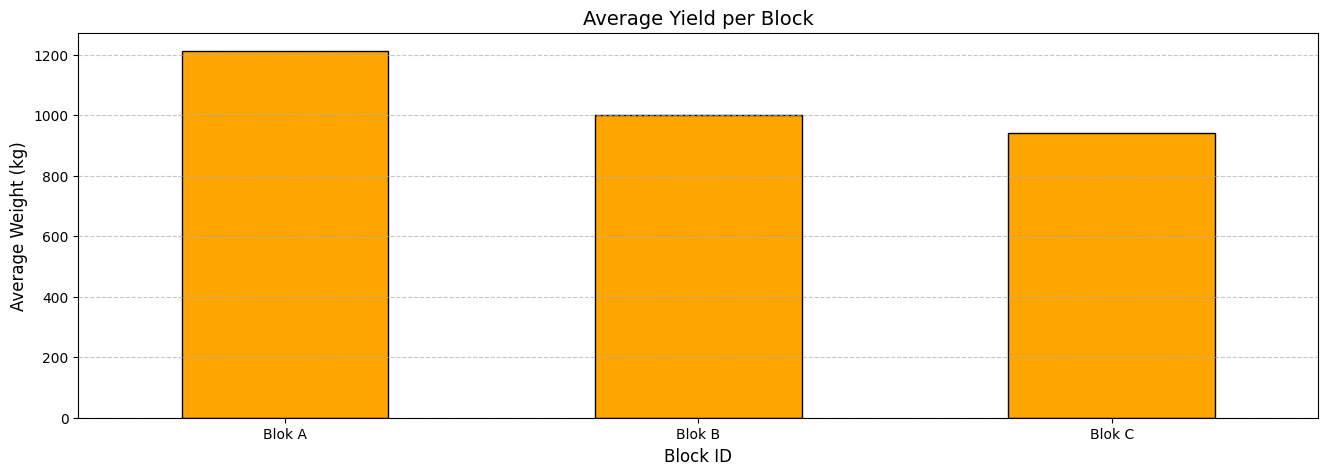

In [97]:
produktivitas_blok = dafe.groupby('Block_ID', observed=True)['Total_Weight_kg'].mean()

plt.figure(figsize=(16, 5))
produktivitas_blok.plot(kind='bar', color='orange', edgecolor='black')

plt.title('Average Yield per Block', fontsize=14)
plt.xlabel('Block ID', fontsize=12)
plt.ylabel('Average Weight (kg)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

**Based on the data analysis, which harvester should receive the highest bonus this week, and which block produced the most palm oil?**

**Based on the analysis, the harvester with the highest performance is [BUDI] with a total of [3275] kg. Meanwhile, Block A is the most productive area with an average yield of 1,212.5 kg**

----
**Merging & Join.**

In [98]:
dafe

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR
0,2024-01-20,Blok A,Budi,1200,5,1175,235000
1,2024-01-20,Blok B,Slamet,850,2,840,168000
2,2024-01-20,Blok A,Joko,1300,8,1260,252000
3,2024-01-21,Blok C,Slamet,900,1,895,179000
4,2024-01-21,Blok B,Budi,1150,4,1130,226000
5,2024-01-22,Blok A,Joko,1250,3,1235,247000
6,2024-01-22,Blok C,Budi,980,2,970,194000
7,2024-01-22,Blok A,Unknown,1100,5,1075,215000


In [99]:
dafe2 = pd.read_csv('karyawan_hrd.csv')
dafe2

,Harvester_ID,Nama,Status,Gaji_Pokok
0,H001,Budi,Tetap,4500000
1,H002,Slamet,Kontrak,3200000
2,H004,Agus,Magang,1500000
3,H005,Dewi,Tetap,4600000


***"The Art of Merging Data"***

**keys function**
1. pd.concat() Menumpuk data (atas-bawah). Cocok kalau kamu punya data Januari dan data Februari terpisah.
2. d.merge(): Menggabungkan data (kiri-kanan) berdasarkan "Kunci" (Key), mirip VLOOKUP di Excel atau JOIN di SQL.

---
1: Inner Join (Mencari yang Cocok Saja)
- Kepala Kebun hanya ingin melihat laporan panen yang namanya terdaftar di HRD.
- Tugas: Gabungkan data_panen dan data_karyawan.
- Syarat: Hanya tampilkan data yang ID-nya atau namanya ada di KEDUA tabel. Data si "Joko" dan 'Unknown' harusnya hilang.
- Clue: Gunakan how='inner'

In [105]:
match0 = pd.merge(
                dafe, 
                dafe2,
                left_on='Harvester', # we dont have ID
                right_on='Nama',
                how='inner')

match0

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,2024-01-20,Blok A,Budi,1200,5,1175,235000,H001,Budi,Tetap,4500000
1,2024-01-20,Blok B,Slamet,850,2,840,168000,H002,Slamet,Kontrak,3200000
2,2024-01-21,Blok C,Slamet,900,1,895,179000,H002,Slamet,Kontrak,3200000
3,2024-01-21,Blok B,Budi,1150,4,1130,226000,H001,Budi,Tetap,4500000
4,2024-01-22,Blok C,Budi,980,2,970,194000,H001,Budi,Tetap,4500000


---
2: Left Join (Prioritas Data Panen)
- Kepala Kebun marah, "Kenapa data panen 'Joko' hilang? Saya mau lihat semua hasil panen, peduli amat dia terdaftar di HRD atau belum!"
- Tugas: Gabungkan lagi, tapi pastikan SEMUA data dari data_panen tetap ada.
- Hasil yang diharapkan: Baris 'joko' dan 'unknown' tetap muncul, tapi kolom Nama dan Status-nya akan berisi NaN (kosong).
- Clue: Gunakan how='left'.

In [100]:
match = pd.merge(
                dafe, 
                dafe2,
                left_on='Harvester', # we dont have ID
                right_on='Nama',
                how='left')

match

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,2024-01-20,Blok A,Budi,1200,5,1175,235000,H001,Budi,Tetap,4500000.0
1,2024-01-20,Blok B,Slamet,850,2,840,168000,H002,Slamet,Kontrak,3200000.0
2,2024-01-20,Blok A,Joko,1300,8,1260,252000,NaN,NaN,NaN,NaN
3,2024-01-21,Blok C,Slamet,900,1,895,179000,H002,Slamet,Kontrak,3200000.0
4,2024-01-21,Blok B,Budi,1150,4,1130,226000,H001,Budi,Tetap,4500000.0
5,2024-01-22,Blok A,Joko,1250,3,1235,247000,NaN,NaN,NaN,NaN
6,2024-01-22,Blok C,Budi,980,2,970,194000,H001,Budi,Tetap,4500000.0
7,2024-01-22,Blok A,Unknown,1100,5,1075,215000,NaN,NaN,NaN,NaN


---
*** sedikit perbaikan***

In [101]:
# Siapa saja yang bermasalah?
data_bermasalah = match[match['Status'].isnull()]

print("--- DAFTAR PEMANEN ILEGAL / TIDAK TERDAFTAR ---")
display(data_bermasalah[['Date', 'Harvester', 'Total_Weight_kg']])

# berapa kasus?
jumlah_kasus = len(data_bermasalah)
print(f"\nTotal Kasus Tidak Terdaftar: {jumlah_kasus} baris")

--- DAFTAR PEMANEN ILEGAL / TIDAK TERDAFTAR ---


,Date,Harvester,Total_Weight_kg
2,2024-01-20,Joko,1300
5,2024-01-22,Joko,1250
7,2024-01-22,Unknown,1100



Total Kasus Tidak Terdaftar: 3 baris


In [102]:
# Mengisi data kosong (NaN) dengan pesan
match['Status'] = match['Status'].fillna('Belum Terdaftar')
display(match)

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,2024-01-20,Blok A,Budi,1200,5,1175,235000,H001,Budi,Tetap,4500000.0
1,2024-01-20,Blok B,Slamet,850,2,840,168000,H002,Slamet,Kontrak,3200000.0
2,2024-01-20,Blok A,Joko,1300,8,1260,252000,NaN,NaN,Belum Terdaftar,NaN
3,2024-01-21,Blok C,Slamet,900,1,895,179000,H002,Slamet,Kontrak,3200000.0
4,2024-01-21,Blok B,Budi,1150,4,1130,226000,H001,Budi,Tetap,4500000.0
5,2024-01-22,Blok A,Joko,1250,3,1235,247000,NaN,NaN,Belum Terdaftar,NaN
6,2024-01-22,Blok C,Budi,980,2,970,194000,H001,Budi,Tetap,4500000.0
7,2024-01-22,Blok A,Unknown,1100,5,1075,215000,NaN,NaN,Belum Terdaftar,NaN


In [104]:
# handling missing values
# 1. Isi Gaji Pokok yang kosong dengan 0
match['Gaji_Pokok'] = match['Gaji_Pokok'].fillna(0)

# 2. (Opsional tapi Rapi) Jika kolom 'Nama' kosong, ambil dari kolom 'Harvester'
match['Nama'] = match['Nama'].fillna(match['Harvester'])

# 3. Cek hasil akhir
print("--- FINAL REPORT SIAP CETAK ---")
display(match)

--- FINAL REPORT SIAP CETAK ---


,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,2024-01-20,Blok A,Budi,1200,5,1175,235000,H001,Budi,Tetap,4500000.0
1,2024-01-20,Blok B,Slamet,850,2,840,168000,H002,Slamet,Kontrak,3200000.0
2,2024-01-20,Blok A,Joko,1300,8,1260,252000,NaN,Joko,Belum Terdaftar,0.0
3,2024-01-21,Blok C,Slamet,900,1,895,179000,H002,Slamet,Kontrak,3200000.0
4,2024-01-21,Blok B,Budi,1150,4,1130,226000,H001,Budi,Tetap,4500000.0
5,2024-01-22,Blok A,Joko,1250,3,1235,247000,NaN,Joko,Belum Terdaftar,0.0
6,2024-01-22,Blok C,Budi,980,2,970,194000,H001,Budi,Tetap,4500000.0
7,2024-01-22,Blok A,Unknown,1100,5,1075,215000,NaN,Unknown,Belum Terdaftar,0.0


---
3: Full Outer Join (Melihat Seluruh Semesta)
- HRD ingin rekonsiliasi data. "Siapa yang panen tapi gak ada di database saya? Dan siapa karyawan saya yang gak pernah panen?"
- Tugas: Gabungkan agar SEMUA data dari kedua tabel muncul.
- Hasil yang diharapkan: H003 muncul, H004 (Agus) juga muncul (walaupun dia gak panen, barisnya tetap ada dengan Total_Berat_kg = NaN).
- Clue: Gunakan how='outer'.

In [109]:
match_outer = pd.merge(
                dafe, 
                dafe2,
                left_on='Harvester', # we dont have ID
                right_on='Nama',
                how='outer')

match_outer

,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,H004,Agus,Magang,1500000.0
1,2024-01-20,Blok A,Budi,1200.0,5.0,1175.0,235000.0,H001,Budi,Tetap,4500000.0
2,2024-01-21,Blok B,Budi,1150.0,4.0,1130.0,226000.0,H001,Budi,Tetap,4500000.0
3,2024-01-22,Blok C,Budi,980.0,2.0,970.0,194000.0,H001,Budi,Tetap,4500000.0
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,H005,Dewi,Tetap,4600000.0
5,2024-01-20,Blok A,Joko,1300.0,8.0,1260.0,252000.0,NaN,NaN,NaN,NaN
6,2024-01-22,Blok A,Joko,1250.0,3.0,1235.0,247000.0,NaN,NaN,NaN,NaN
7,2024-01-20,Blok B,Slamet,850.0,2.0,840.0,168000.0,H002,Slamet,Kontrak,3200000.0
8,2024-01-21,Blok C,Slamet,900.0,1.0,895.0,179000.0,H002,Slamet,Kontrak,3200000.0
9,2024-01-22,Blok A,Unknown,1100.0,5.0,1075.0,215000.0,NaN,NaN,NaN,NaN


In [108]:
# 1. Isi yang tidak panen (Agus/Dewi) dengan angka 0
cols_to_fix = ['Total_Weight_kg', 'Rotten_Bunches', 'Net_Weight_kg', 'Wages_IDR']
match_outer[cols_to_fix] = match_outer[cols_to_fix].fillna(0)

# 2. Isi Gaji yang tidak terdaftar (Joko) dengan 0
match_outer['Gaji_Pokok'] = match_outer['Gaji_Pokok'].fillna(0)

# 3. Rapikan Nama & Status
match_outer['Nama'] = match_outer['Nama'].fillna(match_outer['Harvester']) # Isi nama Joko
match_outer['Status'] = match_outer['Status'].fillna('Unregistered')       # Isi Status
match_outer['Harvester'] = match_outer['Harvester'].fillna(match_outer['Nama']) # Isi nama Agus ke kolom Harvester

print("--- LAPORAN LENGKAP (SEMUA PIHAK) ---")
display(match_outer)

--- LAPORAN LENGKAP (SEMUA PIHAK) ---


,Date,Block_ID,Harvester,Total_Weight_kg,Rotten_Bunches,Net_Weight_kg,Wages_IDR,Harvester_ID,Nama,Status,Gaji_Pokok
0,NaT,NaN,Agus,0.0,0.0,0.0,0.0,H004,Agus,Magang,1500000.0
1,2024-01-20,Blok A,Budi,1200.0,5.0,1175.0,235000.0,H001,Budi,Tetap,4500000.0
2,2024-01-21,Blok B,Budi,1150.0,4.0,1130.0,226000.0,H001,Budi,Tetap,4500000.0
3,2024-01-22,Blok C,Budi,980.0,2.0,970.0,194000.0,H001,Budi,Tetap,4500000.0
4,NaT,NaN,Dewi,0.0,0.0,0.0,0.0,H005,Dewi,Tetap,4600000.0
5,2024-01-20,Blok A,Joko,1300.0,8.0,1260.0,252000.0,NaN,Joko,Unregistered,0.0
6,2024-01-22,Blok A,Joko,1250.0,3.0,1235.0,247000.0,NaN,Joko,Unregistered,0.0
7,2024-01-20,Blok B,Slamet,850.0,2.0,840.0,168000.0,H002,Slamet,Kontrak,3200000.0
8,2024-01-21,Blok C,Slamet,900.0,1.0,895.0,179000.0,H002,Slamet,Kontrak,3200000.0
9,2024-01-22,Blok A,Unknown,1100.0,5.0,1075.0,215000.0,NaN,Unknown,Unregistered,0.0


"The Full Outer Join reveals two insights: 1) Employees like Agus and Dewi generated zero revenue (no harvest data), and 2) Unregistered workers like Joko contributed to production but have missing HR records."

- joko dan unknown belum teregistrasi